IMPORT LIBRARIES


In [56]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
import re

In [57]:
df=pd.read_csv('/content/Twitter_Sentiments6.csv')
df.head()

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


In [58]:
df.shape

(31962, 1)

CONVERTING TO LOWERCASE

In [59]:
df['clean_text']=df['tweet'].str.lower()
df.head()

,tweet,clean_text
0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,factsguide: society now #motivation,factsguide: society now #motivation


REMOVAL OF PUNCTUATION

In [60]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
def remove_punctuations(text):
  punctuations=string.punctuation
  return text.translate(str.maketrans('','',punctuations))

In [62]:
df['clean_text']=df['clean_text'].apply(lambda x: remove_punctuations(x))
df.head()

,tweet,clean_text
0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,factsguide: society now #motivation,factsguide society now motivation


REMOVAL OF STOPWORDS

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [65]:
STOPWORDS=set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in STOPWORDS])

In [66]:
df['clean_text']=df['clean_text'].apply(lambda x: remove_stopwords(x))
df.head()

,tweet,clean_text
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love u take u time urð± ðððð...
4,factsguide: society now #motivation,factsguide society motivation


REMOVAL OF SPECIAL CHARECTERS

In [67]:
import re
def remove_spl_chars(text):
  text=re.sub('[^a-zA-Z0-9]', ' ', text)
  text=re.sub('\s+', ' ', text)
  return text

In [68]:
df['clean_text']=df['clean_text'].apply(lambda x: remove_spl_chars(x))
df.head()

,tweet,clean_text
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love u take u time ur
4,factsguide: society now #motivation,factsguide society motivation


STEMMING

In [69]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [70]:
df['stemmed_text']=df['clean_text'].apply(lambda x: stem_words(x))
df.head()

,tweet,clean_text,stemmed_text
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...,user father dysfunct selfish drag kid dysfunct...
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...,user user thank lyft credit cant use caus dont...
2,bihday your majesty,bihday majesty,bihday majesti
3,#model i love u take with u all the time in ...,model love u take u time ur,model love u take u time ur
4,factsguide: society now #motivation,factsguide society motivation,factsguid societi motiv


LEMMATIZATION & POS TAGGING

In [71]:
from nltk import pos_tag
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
wordnet_map={"N":wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

def lemmatize_words(text):
  pos_text=pos_tag(text.split())
  return " ".join([lemmatizer.lemmatize(word,wordnet_map.get(pos[0],wordnet.NOUN)) for word,pos in pos_text])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
 nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [73]:
df['lemmatized_text']=df['clean_text'].apply(lambda x: lemmatize_words(x))
df.head()

,tweet,clean_text,stemmed_text,lemmatized_text
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...,user father dysfunct selfish drag kid dysfunct...,user father dysfunctional selfish drag kid dys...
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...,user user thank lyft credit cant use caus dont...,user user thanks lyft credit cant use cause do...
2,bihday your majesty,bihday majesty,bihday majesti,bihday majesty
3,#model i love u take with u all the time in ...,model love u take u time ur,model love u take u time ur,model love u take u time ur
4,factsguide: society now #motivation,factsguide society motivation,factsguid societi motiv,factsguide society motivation


VISUALIZING MOST COMMONLY USED WORDS In lemmatized_text

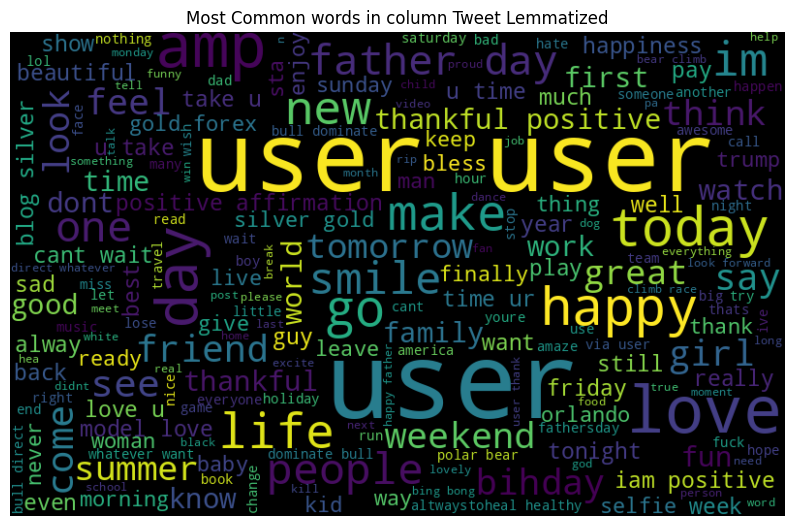

In [75]:
all_words = ' '.join([text for text in df['lemmatized_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

 the most prominent word is “user”, which suggests that the term “user” is frequently used in the tweets. Other common words include “happy”, “love”, “today”, “new”, “thankful”, and “positive”. This could indicate that the tweets are generally positive in nature and often express gratitude or happiness.

SENTIMENT SCORE FOR EACH TWEETS

In [76]:
def get_sentiment(tweet):
    # Create TextBlob object
    blob = TextBlob(tweet)
    # Return polarity
    return blob.sentiment.polarity
df['sentiment'] = df['lemmatized_text'].apply(get_sentiment)

In [77]:
df.head()

,tweet,clean_text,stemmed_text,lemmatized_text,sentiment
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...,user father dysfunct selfish drag kid dysfunct...,user father dysfunctional selfish drag kid dys...,-0.3
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...,user user thank lyft credit cant use caus dont...,user user thanks lyft credit cant use cause do...,0.2
2,bihday your majesty,bihday majesty,bihday majesti,bihday majesty,0.0
3,#model i love u take with u all the time in ...,model love u take u time ur,model love u take u time ur,model love u take u time ur,0.5
4,factsguide: society now #motivation,factsguide society motivation,factsguid societi motiv,factsguide society motivation,0.0


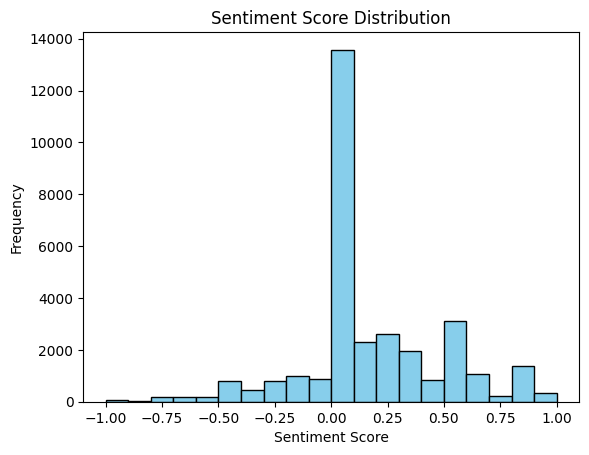

In [78]:
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [79]:
def categorize_sentiment(score):
    if score < 0:
        return 'negative'
    elif score > 0:
        return 'positive'
    else:
        return 'neutral'
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)


In [80]:
df.head()

,tweet,clean_text,stemmed_text,lemmatized_text,sentiment,sentiment_category
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...,user father dysfunct selfish drag kid dysfunct...,user father dysfunctional selfish drag kid dys...,-0.3,negative
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...,user user thank lyft credit cant use caus dont...,user user thanks lyft credit cant use cause do...,0.2,positive
2,bihday your majesty,bihday majesty,bihday majesti,bihday majesty,0.0,neutral
3,#model i love u take with u all the time in ...,model love u take u time ur,model love u take u time ur,model love u take u time ur,0.5,positive
4,factsguide: society now #motivation,factsguide society motivation,factsguid societi motiv,factsguide society motivation,0.0,neutral


In [81]:
sentiment_counts = df['sentiment_category'].value_counts()
print(sentiment_counts)

positive    15326
neutral     12083
negative     4553
Name: sentiment_category, dtype: int64


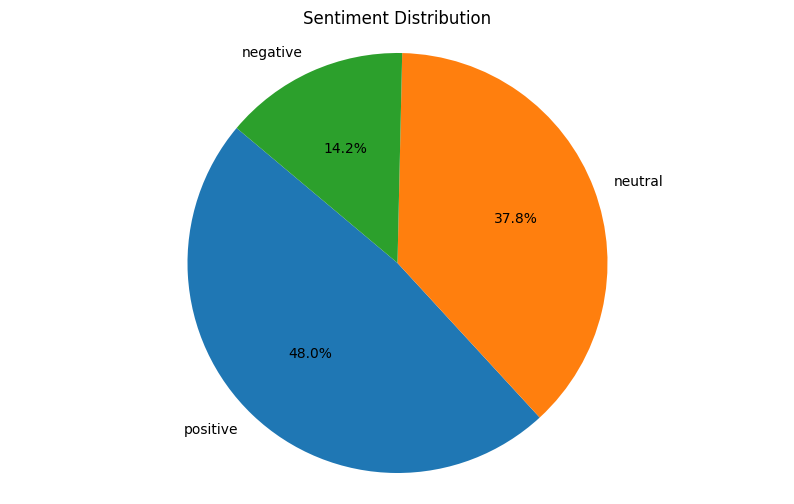

In [82]:
plt.figure(figsize=(10,6))
plt.pie(sentiment_counts, labels = sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Sentiment Distribution')
plt.show()

FEATURE EXTRACTION

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [84]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['lemmatized_text'])

In [85]:
tfidf_matrix

<31962x37764 sparse matrix of type '<class 'numpy.float64'>'
	with 250335 stored elements in Compressed Sparse Row format>

MODEL TRAINING

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [87]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['lemmatized_text'])
y = df['sentiment_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.93      0.63      0.76       899
     neutral       0.84      0.99      0.91      2398
    positive       0.97      0.92      0.95      3096

    accuracy                           0.91      6393
   macro avg       0.91      0.85      0.87      6393
weighted avg       0.91      0.91      0.90      6393

